<a href="https://colab.research.google.com/github/Sagnik220/Parkinsons/blob/main/Parkinsons_PyCARET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pycaret

     |████████████████████████████████| 266kB 7.0MB/s 
     |████████████████████████████████| 276kB 11.1MB/s 
     |████████████████████████████████| 1.7MB 12.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 256kB 39.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 14.2MB 264kB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 112kB 41.7MB/s 
     |████████████████████████████████| 6.8MB 35.9MB/s 
     |████████████████████████████████| 174kB 47.1MB/s 
     |████████████████████████████████| 2.0MB 20.8MB/s 
     |████████████████████████████████| 1.4MB 32.2MB/s 
     |████████████████████████████████| 10.1MB 29.7MB/s 
     |████████████████████████████████| 3.1MB 35.8MB/s 
     |████████████████████████████████| 1.1MB 26.8M

In [2]:
# Loading data from pycaret
from pycaret.datasets import get_data
data = get_data('parkinsons') 

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [9]:
from pycaret.regression import *
s = setup(data, target = 'PPE')

,Description,Value
0,session_id,2679
1,Target,PPE
2,Original Data,"(5875, 22)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4112, 19)"


In [11]:
best_model=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0251,0.0012,0.0346,0.8562,0.0274,0.1282,0.248
et,Extra Trees Regressor,0.0259,0.0013,0.0357,0.8464,0.0284,0.1327,1.501
rf,Random Forest Regressor,0.0262,0.0013,0.0360,0.8439,0.0286,0.1347,3.751
gbr,Gradient Boosting Regressor,0.0270,0.0013,0.0363,0.8416,0.0289,0.1411,1.258
ada,AdaBoost Regressor,0.0330,0.0018,0.0430,0.7776,0.0345,0.1832,0.462
lr,Linear Regression,0.0332,0.0020,0.0441,0.7668,0.0348,0.1712,0.245
lar,Least Angle Regression,0.0333,0.0020,0.0442,0.7659,0.0349,0.1713,0.018
br,Bayesian Ridge,0.0338,0.0021,0.0455,0.7515,0.0356,0.1731,0.018
dt,Decision Tree Regressor,0.0377,0.0027,0.0517,0.6786,0.0410,0.1877,0.068
ridge,Ridge Regression,0.0412,0.0029,0.0538,0.6527,0.0424,0.2087,0.014


In [12]:
print(best_model)

[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2679, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2679, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion

In [17]:
lightgbm_model=create_model('lightgbm', fold = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0267,0.0012,0.0350,0.8456,0.0281,0.1362
1,0.0256,0.0013,0.0364,0.8087,0.0291,0.1327
2,0.0241,0.0010,0.0314,0.8776,0.0250,0.1232
3,0.0251,0.0012,0.0353,0.8536,0.0280,0.1492
4,0.0273,0.0014,0.0369,0.8734,0.0290,0.1395
5,0.0225,0.0009,0.0305,0.8924,0.0245,0.1212
6,0.0244,0.0013,0.0354,0.8403,0.0281,0.1210
7,0.0292,0.0017,0.0409,0.8024,0.0317,0.1325
8,0.0240,0.0010,0.0320,0.8746,0.0253,0.1155
9,0.0234,0.0010,0.0312,0.8809,0.0250,0.1185


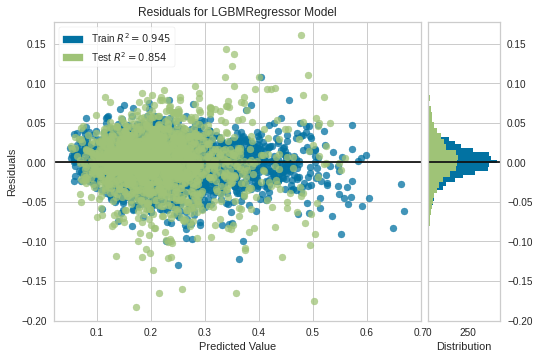

In [20]:
plot_model(lightgbm_model)

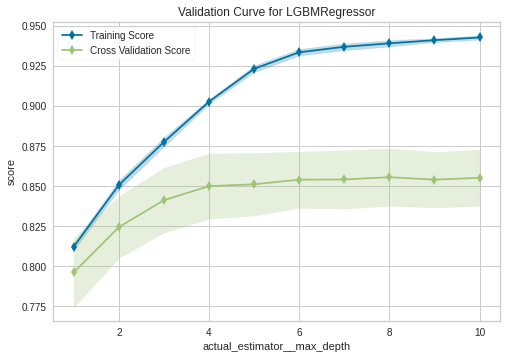

In [21]:
plot_model(lightgbm_model,'vc')

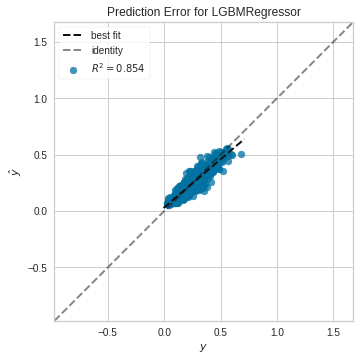

In [22]:
plot_model(lightgbm_model,'error')

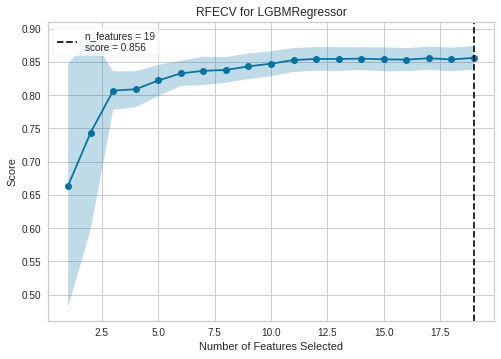

In [24]:
plot_model(lightgbm_model,'rfe')

In [25]:
save_model(lightgbm_model,'parkinsons')


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='PPE',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                  